In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import openpyxl
import matplotlib.pyplot as plt
%matplotlib inline
from variables import country_Orig

### This script followes the next steps:
1. Retrieve unique values included in Amsterdam raw data
2. Remove empty entries
3. Calculate total population for 

In [2]:
city="ams"
base_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
# Paths for the Population Data --------------------------------------------------------------
#path to ancillary data folder
ancillary_data_folder_path = base_dir + "/data_prep/{}_Projectdata/AncillaryData".format(city)
ancillary_POPdata_folder_path = base_dir + "/data_prep/{}_Projectdata/PopData".format(city)
image_path= base_dir + "/data_prep/{}_Projectdata/PopData/images".format(city)

### Visualizions: Line Diagrams of various categories 

In [3]:
popframe = pd.read_excel(ancillary_POPdata_folder_path + "/EXCEL/sumNew.xlsx", header=0)

In [4]:
popframe.iloc[:, 1:].set_index('Year')

,L1_TOTALPOP,L2_CHILDREN,L3_STUDENTS,L4_MOBILE_ADULTS,L5_NOT_MOBILE_ADULTS,L6_ELDERLY,L7_IMMIGRANTS,L8_EU_IMMIGRANTS,L9_NONEU_IMMIGRANTS,L11_BIRTHS,...,L10_MAF,L30_XKX,L10_TKM,L10_IOT,L10_PLW,L10_VUT,L10_ASM,L30_NLD_BES1,L30_BOTs_TDC,L10_SSD
Year,,,,,,,,,,,,,,,,,,,,,
1992,719923,139564,154253,191592,134534,99980,47397,22608,148276,12427,...,0,0,0,0,0,0,0,0,0,0
1994,722350,143285,144336,198493,139333,96903,47939,22070,153522,12681,...,0,0,0,0,0,0,0,0,0,0
1996,715063,144418,134375,199987,142936,93347,52367,19577,152211,12168,...,0,0,0,0,0,0,0,0,0,0
1998,727095,148286,132247,206379,149416,90767,59441,20818,160178,13218,...,0,0,0,0,0,0,0,0,0,0
2000,734540,151474,125589,212972,156425,88080,68862,22114,167582,13761,...,0,0,0,0,0,0,0,0,0,0
2002,736045,154757,117743,214005,164245,85295,76021,22777,173111,13354,...,0,0,0,0,0,0,0,0,0,0
2004,742951,157035,118398,211798,171795,83925,83479,23923,176419,13449,...,0,0,0,0,0,0,0,0,0,0
2006,743104,155479,122453,203195,178388,83589,86207,23887,173372,12860,...,0,0,0,0,0,0,0,0,0,0
2008,756347,156388,131271,198716,185800,84172,95617,28205,175304,13306,...,0,0,0,0,0,0,0,0,0,0


## Examining the Migrant populations
The Dataset includes 2 categories of countries: the L10 (OFFICIAL) and L30 (UNOFFICIAL) identifiers

In [5]:
#Select all Migrant Populations and keep year index
migrants = [x for x in popframe.columns if x.startswith("L10_") or x.startswith('L30_') or x.startswith('Year')]
migrantsDF = pd.DataFrame(popframe, columns=migrants).set_index('Year')
migrantsDF.drop('L10_NLD', inplace=True, axis=1)

### Plot graphs of 15largest groups based on their population in 2018

In [6]:
top15 = migrantsDF.iloc[13].nlargest(15)
l15 = top15.index.to_list()
top15DF = pd.DataFrame(migrantsDF, columns=l15)

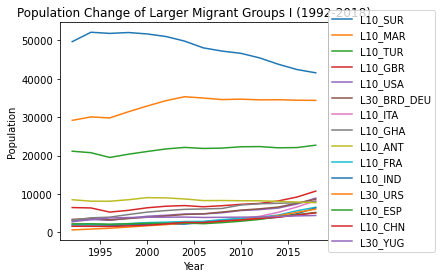

In [7]:
ax = plt.gca()
# Shink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lines = [] 
for i in top15DF:
    #countryAbbr = i.split(".",-1)[0]
    lines = top15DF[i].plot(kind='line', x='Year', y='Population',ax=ax, ylabel='Population', title ='Population Change of Larger Migrant Groups I (1992-2018)')  
plt.legend(bbox_to_anchor=(1.20,0.5), loc='center', borderaxespad=0.)
plt.savefig(image_path + '/PopChangeLMGI.png', dpi=300)
#plt.show() 

### Plot graphs of next 15largest groups based on their population in 2018

In [8]:
top30 = migrantsDF.iloc[13].nlargest(30)
l30 = top30.index.to_list()
l30 = [x for x in l30 if x not in l15]
top30DF = pd.DataFrame(migrantsDF, columns=l30)

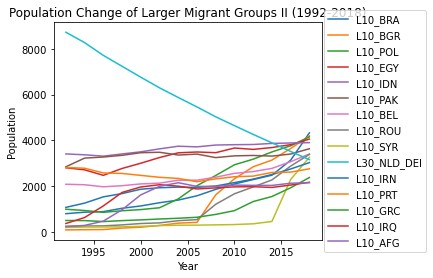

In [9]:
ax = plt.gca()
# Shink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lines = [] 
for i in top30DF:
    #countryAbbr = i.split(".",-1)[0]
    lines = top30DF[i].plot(kind='line', x='Year', y='Population',ax=ax, ylabel='Population', title ='Population Change of Larger Migrant Groups II (1992-2018)')  
plt.legend(bbox_to_anchor=(1.20,0.5), loc='center', borderaxespad=0.)
plt.savefig(image_path + '/PopChangeLMGII.png', dpi=300)
#plt.show() 

## L30 countries
Most of the largest groups come from official countries, but there are also some large groups from L30... 
The population from official countries based on UNSD abbreviations ranges from 175.000-267.000 (223countries).
The population from unofficial countries ranges from 21.000-30.000 approximately (101countries).

In [10]:
# How many migrants come from the L10 countries? 
pop_L10 = [x for x in migrantsDF.columns if x.startswith('L10_')]
migrants_L10 = pd.DataFrame(migrantsDF, columns = pop_L10)
migrants_L10["suml10"] = migrants_L10.sum(axis=1)
#migrants_L10

In [11]:
#Are there any L10 with more than 3letter abbreviations
for k in pop_L10:
    if len(set(k)) >7:
        print(k)

L10_CPV.1
L10_ARE.1
L10_VCT.1


In [12]:
# How many migrants come from the L30 countries? 
pop_L30 = [x for x in migrantsDF.columns if x.startswith('L30_')]
migrants_L30 = pd.DataFrame(migrantsDF, columns = pop_L30)
migrants_L30["suml30"] = migrants_L30.sum(axis=1)
migrants_L30

,L30_OTH,L30_UK_BWA,L30_BEL_COD,L30_BRD_DEU,L30_UK_KEN,L30_UK_BWI,L30_UK_BRN,L30_UK_ANT,L30_UK_BWI1,L30_UK_HND,...,L30_ANT_ANT,L30_BEL_URN,L30_DEU_OAFR,L30_DEU_WAFR,L30_BOTs_SKT,L30_NLD_BES,L30_XKX,L30_NLD_BES1,L30_BOTs_TDC,suml30
Year,,,,,,,,,,,,,,,,,,,,,
1992,2,2,78,3376,66,146,9,8,553,1,...,0,0,0,0,0,0,0,0,0,20961
1994,2,1,74,3571,67,136,7,11,572,0,...,0,0,0,0,0,0,0,0,0,21800
1996,3,1,78,3236,69,117,6,6,562,1,...,0,0,0,0,0,0,0,0,0,21483
1998,1,1,69,3596,66,116,6,7,561,1,...,0,0,0,0,0,0,0,0,0,21935
2000,2,1,68,3924,58,107,6,8,561,1,...,0,0,0,0,0,0,0,0,0,22331
2002,1,2,59,4251,59,103,6,7,545,0,...,0,0,0,0,0,0,0,0,0,22577
2004,2,1,54,4655,58,95,5,8,537,0,...,0,0,0,0,0,0,0,0,0,22942
2006,2,1,50,4811,54,93,5,8,518,0,...,1,4,0,0,0,0,0,0,0,22428
2008,1,1,50,5281,54,90,5,9,500,1,...,1,1,0,0,0,0,0,0,0,23024


## Examining populations from L30 countries
1st step: Summing up similar countries and creating categories for colonies

In [13]:
migrants_L30 = [x for x in migrantsDF.columns if x.startswith('L30_')] #and migrantsDF.at[2018, x ] > 30
migrantsDF_L30 = pd.DataFrame(migrantsDF, columns=migrants_L30)
#migrants_L30

In [14]:
# If the colonies can be realted to modern official countries are assigned to them, otherwise they are assigned to the corresponding colonies
dictProblem = {'Congo' :['L30_BEL_COD','L10_COD', 'L10_COD_COD' ,'L30_ZAR_COD', 'L30_OTH_COD', ],
                'Germany':['L30_BRD_DEU', 'L10_DEU', 'L30_DDDE'],
                'Kenya' : ['L30_UK_KEN', 'L10_KEN'],
                'Yugoslavia': ['L30_YUG_YUG', 'L30_YUG'],
                'Yemen': ['L30_YEM_YEM', 'L10_YEM'],
                'UKcolonies': ['L30_UK_BWA', 'L30_UK_BWI', 'L30_UK_BRN', 'L30_UK_ANT', 'L30_UK_BWI1', 'L30_UK_HND', 'L30_UK_BEI','L30_UK_LKA',
                            'L30_UK_GOK','L30_UK_MWI', 'L30_UK_SGP', 'L30_UK_TZA','L30_UK_ZAF','L30_UK_LSO','L30_UK_MYS','L30_UK_AFR','L30_UK_CMR','L30_UK_MYS.1',
                            'L30_BOTs_SKT', 'L30_BOTs_TDC', 'L10_IOT'], #'L30_UK_KEN','L30_UK_BWI', 'L30_UK_BWI1', 'L30_UK_BEI', 'L30_UK_GOK','L30_UK_LKA'
                'BELcolonies': [ 'L30_BEL_RWA', 'L30_BEL_URN'],
                'PRTcolonies': ['L30_PRT_MOZ', 'L30_PRT_AGO', 'L30_PRT_AGO.1'],
                'NLDcolonies': ['L30_NLD_PNG', 'L30_NLD_DEI', 'L30_NLD_BES', 'L30_NLD_BES1'],
                'FRAcolonies': ['L30_FRA_FRI', 'L30_FRA_FWA', 'L30_FRA_CMR', 'L30_FRA_DJI', 'L30_FRA_IND'],
                'Spain' : ['L30_CAN_ESP', 'L10_ESP'],
                'Myanmar' : ['L30_BUMM', 'L10_MMR'],
                'China' : ['L30_TIB_CHN', 'L10_CHN'],
                'Somalia' : ['L10_SOM', 'L30_FRA_SOM', 'L30_ITA_SOM', 'L30_UK_SOM'],
                'Russia' : ['L10_RUS', 'L30_RUS_RUS']
                
}

In [15]:
def plotDiagrma(dataframe, key, columnsList):
    checkCountries = pd.DataFrame(dataframe, columns = columnsList)
    ax = plt.gca()
    # Shink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    lines = [] 
    for i in checkCountries:
        #countryAbbr = i.split(".",-1)[0]
        lines = checkCountries[i].plot(kind='line',ax=ax, ylabel='Population', title ='Checking {}'.format(key))  
    plt.legend(bbox_to_anchor=(1.20,0.5), loc='center', borderaxespad=0., fontsize= 7)
    plt.savefig(image_path + '/00_checking_{}.png'.format(key), dpi=300)
    plt.show() 

Congo ['L30_BEL_COD', 'L10_COD', 'L10_COD_COD', 'L30_ZAR_COD', 'L30_OTH_COD']


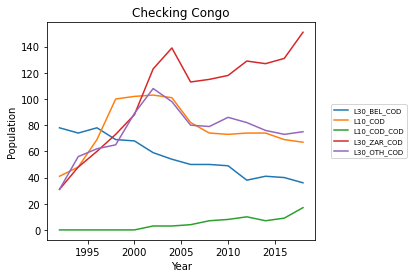

Germany ['L30_BRD_DEU', 'L10_DEU', 'L30_DDDE']


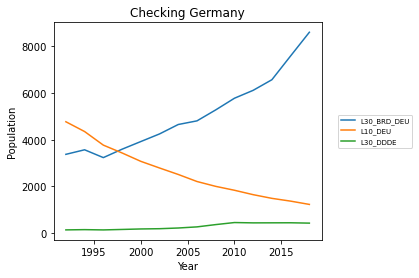

Kenya ['L30_UK_KEN', 'L10_KEN']


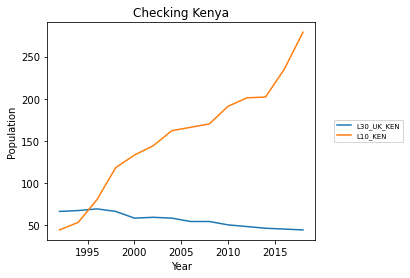

Yugoslavia ['L30_YUG_YUG', 'L30_YUG']


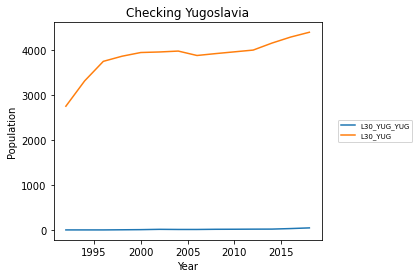

Yemen ['L30_YEM_YEM', 'L10_YEM']


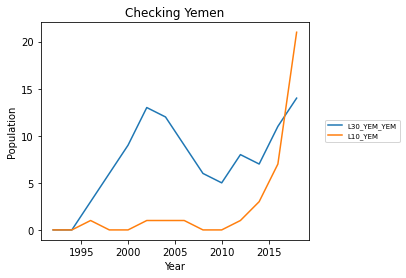

UKcolonies ['L30_UK_BWA', 'L30_UK_BWI', 'L30_UK_BRN', 'L30_UK_ANT', 'L30_UK_BWI1', 'L30_UK_HND', 'L30_UK_BEI', 'L30_UK_LKA', 'L30_UK_GOK', 'L30_UK_MWI', 'L30_UK_SGP', 'L30_UK_TZA', 'L30_UK_ZAF', 'L30_UK_LSO', 'L30_UK_MYS', 'L30_UK_AFR', 'L30_UK_CMR', 'L30_UK_MYS.1', 'L30_BOTs_SKT', 'L30_BOTs_TDC', 'L10_IOT']


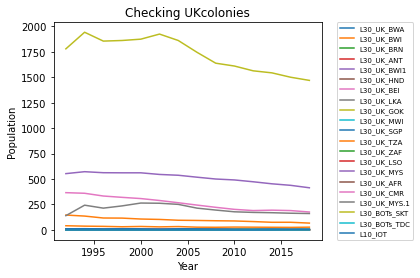

BELcolonies ['L30_BEL_RWA', 'L30_BEL_URN']


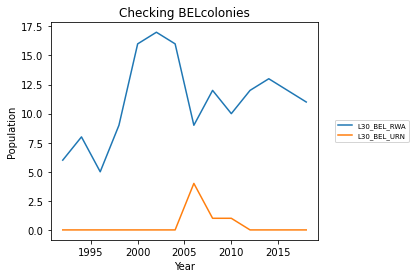

PRTcolonies ['L30_PRT_MOZ', 'L30_PRT_AGO', 'L30_PRT_AGO.1']


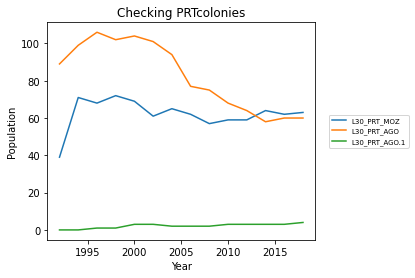

NLDcolonies ['L30_NLD_PNG', 'L30_NLD_DEI', 'L30_NLD_BES', 'L30_NLD_BES1']


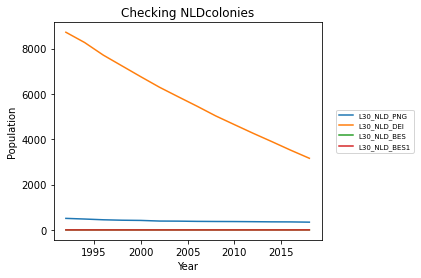

FRAcolonies ['L30_FRA_FRI', 'L30_FRA_FWA', 'L30_FRA_CMR', 'L30_FRA_DJI', 'L30_FRA_IND']


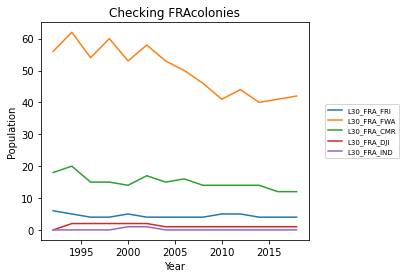

Spain ['L30_CAN_ESP', 'L10_ESP']


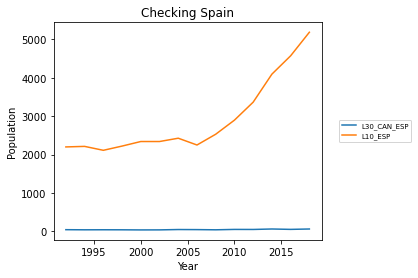

Myanmar ['L30_BUMM', 'L10_MMR']


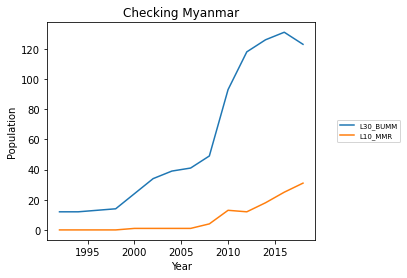

China ['L30_TIB_CHN', 'L10_CHN']


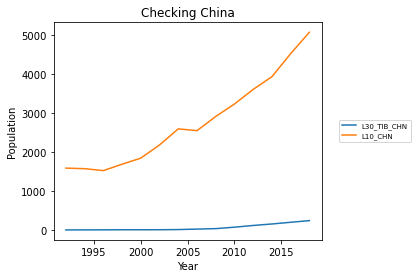

Somalia ['L10_SOM', 'L30_FRA_SOM', 'L30_ITA_SOM', 'L30_UK_SOM']


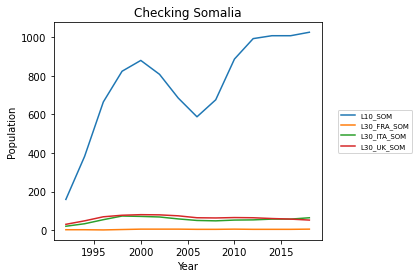

Russia ['L10_RUS', 'L30_RUS_RUS']


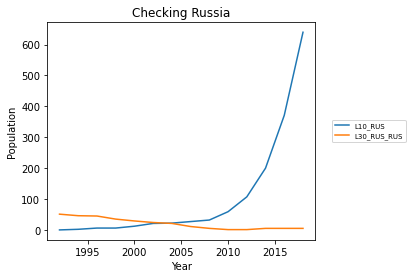

In [16]:
for key in dictProblem:
    selectList = dictProblem['{}'.format(key)]
    print(key, selectList)
    plotDiagrma(migrantsDF, key, selectList)

In [17]:
# If the colonies can be realted to modern official countries are assigned to them, otherwise they are assigned to the corresponding colonies
dictProblem0 = {'L40_COD' :['L30_BEL_COD','L10_COD', 'L10_COD_COD' ,'L30_ZAR_COD', 'L30_OTH_COD', ],
                'L40_DEU':['L30_BRD_DEU', 'L10_DEU', 'L30_DDDE'],
                'L40_KEN' : ['L30_UK_KEN', 'L10_KEN'],
                'L40_YUG': ['L30_YUG_YUG', 'L30_YUG'],
                'L40_YEM': ['L30_YEM_YEM', 'L10_YEM'],
                'L40_UKcol': ['L30_UK_BWA', 'L30_UK_BWI', 'L30_UK_BRN', 'L30_UK_ANT', 'L30_UK_BWI1', 'L30_UK_HND', 'L30_UK_BEI','L30_UK_LKA',
                            'L30_UK_GOK','L30_UK_MWI', 'L30_UK_SGP', 'L30_UK_TZA','L30_UK_ZAF','L30_UK_LSO','L30_UK_MYS','L30_UK_AFR','L30_UK_CMR','L30_UK_MYS.1',
                            'L30_BOTs_SKT', 'L30_BOTs_TDC', 'L10_IOT'], #'L30_UK_KEN','L30_UK_BWI', 'L30_UK_BWI1', 'L30_UK_BEI', 'L30_UK_GOK','L30_UK_LKA'
                'L40_BELcol': [ 'L30_BEL_RWA', 'L30_BEL_URN'],
                'L40_PRTcol': ['L30_PRT_MOZ', 'L30_PRT_AGO', 'L30_PRT_AGO.1'],
                'L40_NLDcol': ['L30_NLD_PNG', 'L30_NLD_DEI', 'L30_NLD_BES', 'L30_NLD_BES1'],
                'L40_FRAcol': ['L30_FRA_FRI', 'L30_FRA_FWA', 'L30_FRA_CMR', 'L30_FRA_DJI', 'L30_FRA_IND'],
                'L40_ESP' : ['L30_CAN_ESP', 'L10_ESP'],
                'L40_MMR' : ['L30_BUMM', 'L10_MMR'],
                'L40_CHN' : ['L30_TIB_CHN', 'L10_CHN'],
                'L40_SOM' : ['L10_SOM', 'L30_FRA_SOM', 'L30_ITA_SOM', 'L30_UK_SOM'],
                'L40_RUS' : ['L10_RUS', 'L30_RUS_RUS'],
                'L40_CPV' : ['L10_CPV.1', 'L10_CPV'],
                'L40_ARE' : ['L10_ARE.1', 'L10_ARE'],
                'L40_VCT' : ['L10_VCT.1', 'L10_VCT']
}

In [18]:
# Create new dataframe copy of the origin popframe where the new columns of the above categories are created and each one of the items in dict values is removed
popDF = popframe.copy()

In [39]:
#18 New columns are created and 66 are dropped
for key in dictProblem0:
    selectList = dictProblem0['{}'.format(key)]
    #print(key, selectList.split('L30_')[-1].lower())
    select = [x for x in popDF if x in selectList]

    popDF['{}'.format(key)] = popDF.loc[:, select].sum(axis=1)
    for i in selectList:
        popDF.drop('{}'.format(i), inplace=True, axis=1)
popDF

SyntaxError: can't assign to function call (<ipython-input-39-503d0466b370>, line 6)

In [45]:
myList= []
for key in dictProblem0:
    selectList = dictProblem0['{}'.format(key)]
    for i in selectList:
        myList.append(i)
len(myList)

67

### From the rest 51 countries that are left in L30 I am creating a new column L40_OTH that sums them

In [48]:
rest_L30 = [x for x in migrantsDF_L30.columns if not x in myList]
l40_oth=[]
for k in rest_L30:
    var= k.split('L30_')[-1].lower()
    l40_oth.append(k)
l40_oth


['L30_OTH',
 'L30_DYBJ',
 'L30_FDA_POL',
 'L30_AEF_AEF',
 'L30_FRA_COD',
 'L30_GOA_GOA',
 'L30_HAW_HAW',
 'L30_CHI_CHI',
 'L30_KOR_KOR',
 'L30_LEE_LEE',
 'L30_PRT_MAD',
 'L30_SGP_MLK',
 'L30_OMN_OMN',
 'L30_NHB',
 'L30_YMD',
 'L30_NTH_RHO',
 'L30_NTH_VNM',
 'L30_unk',
 'L30_AUT_HUN',
 'L30_HVO',
 'L30_PRT_AFR',
 'L30_PRT_IND',
 'L30_PRT_TLS',
 'L30_RHO',
 'L30_SRW_MYS',
 'L30_SEY_SYC',
 'L30_SIAM_THA',
 'L30_URS',
 'L30_ESP_ESH ',
 'L30_TRA_JOR',
 'L30_TCH',
 'L30_ZAN_TZA',
 'L30_STH_RHO',
 'L30_STH_VNM',
 'L30_DEU_NAM',
 'L30_INT',
 'L30_PNG_PNG',
 'L30_ESP_GNQ',
 'L30_WSM_WSM',
 'L30_ARE_ARE',
 'L30_PRT_AZO',
 'L30_GEIC',
 'L30_ESP_AFR',
 'L30_PRT_GNB',
 'L30_PAN_PCZ',
 'L30_TAS_AUS',
 'L30_SCG',
 'L30_ANT_ANT',
 'L30_DEU_OAFR',
 'L30_DEU_WAFR',
 'L30_XKX']

In [ ]:
# If the colonies can be realted to modern official countries are assigned to them, otherwise they are assigned to the corresponding colonies
dictProblem0 = {'L40_COD' :['L30_BEL_COD','L10_COD', 'L10_COD_COD' ,'L30_ZAR_COD', 'L30_OTH_COD', ],
                'L40_DEU':['L30_BRD_DEU', 'L10_DEU', 'L30_DDDE'],
                'L40_KEN' : ['L30_UK_KEN', 'L10_KEN'],
                'L40_YUG': ['L30_YUG_YUG', 'L30_YUG'],
                'L40_YEM': ['L30_YEM_YEM', 'L10_YEM'],
                'L40_UKcol': ['L30_UK_BWA', 'L30_UK_BWI', 'L30_UK_BRN', 'L30_UK_ANT', 'L30_UK_BWI1', 'L30_UK_HND', 'L30_UK_BEI','L30_UK_LKA',
                            'L30_UK_GOK','L30_UK_MWI', 'L30_UK_SGP', 'L30_UK_TZA','L30_UK_ZAF','L30_UK_LSO','L30_UK_MYS','L30_UK_AFR','L30_UK_CMR','L30_UK_MYS.1',
                            'L30_BOTs_SKT', 'L30_BOTs_TDC', 'L10_IOT'], #'L30_UK_KEN','L30_UK_BWI', 'L30_UK_BWI1', 'L30_UK_BEI', 'L30_UK_GOK','L30_UK_LKA'
                'L40_BELcol': [ 'L30_BEL_RWA', 'L30_BEL_URN'],
                'L40_PRTcol': ['L30_PRT_MOZ', 'L30_PRT_AGO', 'L30_PRT_AGO.1'],
                'L40_NLDcol': ['L30_NLD_PNG', 'L30_NLD_DEI', 'L30_NLD_BES', 'L30_NLD_BES1'],
                'L40_FRAcol': ['L30_FRA_FRI', 'L30_FRA_FWA', 'L30_FRA_CMR', 'L30_FRA_DJI', 'L30_FRA_IND'],
                'L40_ESP' : ['L30_CAN_ESP', 'L10_ESP'],
                'L40_MMR' : ['L30_BUMM', 'L10_MMR'],
                'L40_CHN' : ['L30_TIB_CHN', 'L10_CHN'],
                'L40_SOM' : ['L10_SOM', 'L30_FRA_SOM', 'L30_ITA_SOM', 'L30_UK_SOM'],
                'L40_RUS' : ['L10_RUS', 'L30_RUS_RUS'],
                'L40_CPV' : ['L10_CPV.1', 'L10_CPV'],
                'L40_ARE' : ['L10_ARE.1', 'L10_ARE'],
                'L40_VCT' : ['L10_VCT.1', 'L10_VCT'], 
                'L40_OTH': ['L30_OTH', 'L30_DYBJ', 'L30_FDA_POL', 'L30_AEF_AEF', 'L30_FRA_COD', 'L30_GOA_GOA', 'L30_HAW_HAW', 'L30_CHI_CHI', 'L30_KOR_KOR', 'L30_LEE_LEE',
                                'L30_PRT_MAD', 'L30_SGP_MLK', 'L30_OMN_OMN', 'L30_NHB', 'L30_YMD', 'L30_NTH_RHO', 'L30_NTH_VNM', 'L30_unk', 'L30_AUT_HUN', 'L30_HVO',
                                'L30_PRT_AFR', 'L30_PRT_IND', 'L30_PRT_TLS', 'L30_RHO', 'L30_SRW_MYS', 'L30_SEY_SYC', 'L30_SIAM_THA', 'L30_URS', 'L30_ESP_ESH ', 'L30_TRA_JOR',
                                'L30_TCH', 'L30_ZAN_TZA', 'L30_STH_RHO', 'L30_STH_VNM', 'L30_DEU_NAM', 'L30_INT', 'L30_PNG_PNG', 'L30_ESP_GNQ', 'L30_WSM_WSM', 'L30_ARE_ARE',
                                'L30_PRT_AZO', 'L30_GEIC', 'L30_ESP_AFR', 'L30_PRT_GNB', 'L30_PAN_PCZ', 'L30_TAS_AUS', 'L30_SCG', 'L30_ANT_ANT', 'L30_DEU_OAFR', 'L30_DEU_WAFR',
                                'L30_XKX']
}

In [22]:
popDF["L40_OTH"] = popDF.loc[:, rest_L30].sum(axis=1)
popDF.drop(popDF.loc[:, rest_L30], inplace=True, axis=1)

popDF

,Unnamed: 0,Year,L1_TOTALPOP,L2_CHILDREN,L3_STUDENTS,L4_MOBILE_ADULTS,L5_NOT_MOBILE_ADULTS,L6_ELDERLY,L7_IMMIGRANTS,L8_EU_IMMIGRANTS,...,L40_FRAcol,L40_ESP,L40_MMR,L40_CHN,L40_SOM,L40_RUS,L40_CPV,L40_ARE,L40_VCT,L40_OTH
0,0,1992,719923,139564,154253,191592,134534,99980,47397,22608,...,80,2239,12,1586,211,51,368,4,0,1835
1,1,1994,722350,143285,144336,198493,139333,96903,47939,22070,...,89,2250,12,1573,465,48,367,4,0,2008
2,2,1996,715063,144418,134375,199987,142936,93347,52367,19577,...,75,2149,13,1524,788,51,362,5,0,2313
3,3,1998,727095,148286,132247,206379,149416,90767,59441,20818,...,81,2258,14,1690,976,41,363,10,2,2707
4,4,2000,734540,151474,125589,212972,156425,88080,68862,22114,...,75,2374,25,1846,1035,41,356,19,2,3094
5,5,2002,736045,154757,117743,214005,164245,85295,76021,22777,...,82,2375,35,2185,959,45,360,26,3,3422
6,6,2004,742951,157035,118398,211798,171795,83925,83479,23923,...,73,2470,40,2601,821,43,356,31,4,3884
7,7,2006,743104,155479,122453,203195,178388,83589,86207,23887,...,71,2291,42,2567,705,38,353,33,3,3991
8,8,2008,756347,156388,131271,198716,185800,84172,95617,28205,...,65,2567,53,2943,790,37,337,43,3,4586
9,9,2010,780559,160859,139389,199847,194364,86100,105687,32036,...,61,2944,106,3299,1008,60,326,50,3,5193


In [23]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(ancillary_POPdata_folder_path + "/EXCEL/00SumClean.xlsx",  index = False,  header=True)
# Convert the dataframe to an XlsxWriter Excel object.
popDF.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [24]:
c = [x for x in popDF.columns if x.startswith('L30_')]

## Let's take a look at the colonies

In [25]:
coloniesUK = [x for x in migrantsDF.columns if x.startswith('L30_UK') ] #and migrantsDF.at[2018, x ] > 30
coloniesDF_UK = pd.DataFrame(migrantsDF, columns=coloniesUK)
coloniesUK
# BWI: Brits West-Indië, BWI1: Brits-Guyana, BEI: Brits-Indië, GOK: Goudkust, LKA:Ceylon

['L30_UK_BWA',
 'L30_UK_KEN',
 'L30_UK_BWI',
 'L30_UK_BRN',
 'L30_UK_ANT',
 'L30_UK_BWI1',
 'L30_UK_HND',
 'L30_UK_BEI',
 'L30_UK_SOM',
 'L30_UK_LKA',
 'L30_UK_GOK',
 'L30_UK_MWI',
 'L30_UK_SGP',
 'L30_UK_TZA',
 'L30_UK_ZAF',
 'L30_UK_LSO',
 'L30_UK_MYS',
 'L30_UK_AFR',
 'L30_UK_CMR',
 'L30_UK_MYS.1']

In [26]:
coloniesNLD = [x for x in migrantsDF.columns if x.startswith('L30_NLD')] #and migrantsDF.at[2018, x ] > 30
coloniesDF_NLD = pd.DataFrame(migrantsDF, columns=coloniesNLD)
coloniesNLD 
#DEI: Nederlands-Indië, PNG: Nederlands Nieuw-Guinea

['L30_NLD_PNG', 'L30_NLD_DEI', 'L30_NLD_BES', 'L30_NLD_BES1']

In [27]:
coloniesFRA = [x for x in migrantsDF.columns if x.startswith('L30_FRA')] #and migrantsDF.at[2018, x ] > 30
coloniesDF_FRA = pd.DataFrame(migrantsDF, columns=coloniesFRA)
coloniesFRA 

['L30_FRA_FRI',
 'L30_FRA_FWA',
 'L30_FRA_COD',
 'L30_FRA_CMR',
 'L30_FRA_SOM',
 'L30_FRA_DJI',
 'L30_FRA_IND']

In [28]:
coloniesPRT = [x for x in migrantsDF.columns if x.startswith('L30_PRT') and migrantsDF.at[2018, x ] > 30] #and migrantsDF.at[2018, x ] > 30
coloniesDF_PRT = pd.DataFrame(migrantsDF, columns=coloniesPRT)
coloniesPRT

['L30_PRT_MOZ', 'L30_PRT_AGO']

In [29]:
coloniesBEL = [x for x in migrantsDF.columns if x.startswith('L30_BEL')] #and migrantsDF.at[2018, x ] > 30
coloniesDF_BEL = pd.DataFrame(migrantsDF, columns=coloniesBEL)
coloniesBEL 

['L30_BEL_COD', 'L30_BEL_RWA', 'L30_BEL_URN']

In [30]:
coloniesDEU = [x for x in migrantsDF.columns if x.startswith('L30_DEU')] #and migrantsDF.at[2018, x ] > 30
coloniesDF_DEU = pd.DataFrame(migrantsDF, columns=coloniesDEU)
coloniesDEU

['L30_DEU_NAM', 'L30_DEU_OAFR', 'L30_DEU_WAFR']